# The Network and Trajectories of Transitions 
# among Sentential Co-Occurrences of Noun Phrases in
# Plato's *Phaedrus*
## By Moses Boudourides & Sergios Lenis 

**IMPORTANT**: To use this notebook, you'll need to

1. Install IPython Notebook (easiest way: use [Anaconda](http://store.continuum.io))
2. Download this notebook and all other Python scripts used here from [https://github.com/mboudour/WordNets/blob/master/Plato_Phaedrus_Network&Trajectories.ipynb](https://github.com/mboudour/WordNets/blob/master/Plato_Phaedrus_Network&Trajectories.ipynb)
3. Run `ipython notebook` in the same directory where notebook and scripts were put

<a href="http://creativecommons.org/licenses/by/4.0/"><img alt="Creative Commons License" style="border-width:0" src="http://i.creativecommons.org/l/by/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by/4.0/">Creative Commons Attribution 4.0 International License</a>.

### Importing Python Modules 

In [1]:
import random
import nltk
import codecs
from textblob import TextBlob
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter
import imp
from ipywidgets import widgets
import warnings
warnings.filterwarnings('ignore')
# utilsdir='/home/sergios-len/Dropbox/Python Projects (1)/utils/'#tools.py'
# utilsdir='/home/mosesboudourides/Dropbox/Python Projects/utils'

%matplotlib inline 
%load_ext autoreload

## I. Importing the Text of Plato's *Phaedrus*

In [2]:
filename = 'Plato_Phaedrus1.txt'
titlename = "Plato's Phaedrus"

f = codecs.open(filename, "r", encoding="utf-8").read()

num_lines = 0
num_words = 0
num_chars = 0
for line in f:
    words = line.split()
    num_lines += 1
    num_words += len(words)
    num_chars += len(line)
print "%s has number of words = %i and number of characters = %i" %(titlename,num_words,num_chars)

blob = TextBlob(f)

Plato's Phaedrus has number of words = 102009 and number of characters = 125944


## II. Extracting the Most Frequent Noun Phrases in Plato's *Phaedrus*

In [3]:
all_sents=blob.sentences
occurdic=Counter()
for sen in all_sents:
    dd=sen.dict
    for np in dd['noun_phrases']:
        occurdic[np]+=1

df = pd.DataFrame(columns=["%s Noun Phrases" %titlename, "Frequencies"])
u=1
for l,v in occurdic.items(): 
    df.loc[u]=[l,v]
    u+=1

print "The total number of noun phrases in %s is %i." %(titlename,len(df))#len(npA))
df.sort(["Frequencies"], ascending=[0])

cut = 2
df = df[df['Frequencies']>cut].sort(["Frequencies"], ascending=[0])
print "The total number of noun phrases in %s with frequencies > %i is %i." %(titlename,cut,len(df))#len(npA))
df.sort(["Frequencies"], ascending=[0])

The total number of noun phrases in Plato's Phaedrus is 739.
The total number of noun phrases in Plato's Phaedrus with frequencies > 2 is 37.


/home/mosesboudourides/.local/lib/python2.7/site-packages/ipykernel/__main__.py:15: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/home/mosesboudourides/.local/lib/python2.7/site-packages/ipykernel/__main__.py:18: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/home/mosesboudourides/.local/lib/python2.7/site-packages/ipykernel/__main__.py:20: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,Plato's Phaedrus Noun Phrases,Frequencies
734,socrates,215.0
135,phaedrus,211.0
678,lysias,34.0
192,muses,11.0
737,god,9.0
299,zeus,7.0
677,true,5.0
540,well,5.0
441,fair youth,5.0
351,thamus,5.0


In [19]:
%autoreload 2

selectedTerms={}
excluded = ['who','will','exactly','enough','shall','suppose','well']
for k in df["Plato's Phaedrus Noun Phrases"].tolist(): #df["Plato's Phaedrus Noun Phrases"].tolist():
    if k not in excluded:
        selectedTerms[k] = k.capitalize()

# tool= imp.load_source('tools', utilsdir+'/tools.py')
import tools as tool
create_pandas_dataframe_from_text=tool.create_pandas_dataframe_from_text  
dfst,sec_prot,coccurlist,occurlist,dflines=create_pandas_dataframe_from_text(blob,selectedTerms,selectedTerms,titlename)
# print len(sec_prot.nodes()), sec_prot.nodes()
# dfst.sort_values(by='Frequencies').sort(["Frequencies"], ascending=[0])

prot_pol_sub=dflines[['protagonists','#_of_protagonists','polarity','subjectivity']].reset_index()
prot_pol_sub['sentence_id']=prot_pol_sub.index
prot_pol_sub=prot_pol_sub[['sentence_id','protagonists','#_of_protagonists','polarity','subjectivity']]

cuts = 1
prot_pol_sub = prot_pol_sub[prot_pol_sub['#_of_protagonists']>cuts]
lp = prot_pol_sub['protagonists'].tolist()
lpn = []
control_dic={}
for i in lp:
    for j in i:
        lpn.append(j)
        if j not in control_dic:
            print j,'0, 1, 2'
            control_dic[j]=int(raw_input())
# print lpn
# print control_dic
# len(set(lpn))
for nd in sec_prot.nodes():
    if nd not in control_dic:
        continue
    dici=sec_prot.node[nd]
    sec_prot.add_node(nd,attr_dic=dici,type=control_dic[nd])

Acumenus 0, 1, 2
0
Lysias 0, 1, 2
0
Fair youth 0, 1, 2
1
Socrates 0, 1, 2
0
Phaedrus 0, 1, 2
0
Ilissus 0, 1, 2
0
Boreas 0, 1, 2
0
Zeus 0, 1, 2
0
Muses 0, 1, 2
0
Good friend 0, 1, 2
1
Homer 0, 1, 2
0
Stesichorus 0, 1, 2
0
Eros 0, 1, 2
1
Odysseus 0, 1, 2
0
Nestor 0, 1, 2
0
Thrasymachus 0, 1, 2
0
Nymphs 0, 1, 2
0
Thamus 0, 1, 2
0
Theuth 0, 1, 2
0
True 0, 1, 2
1
Isocrates 0, 1, 2
0


In [23]:
print "The total number of sentences in %s with at least %i selected noun phrases in each one of them is %i." %(titlename,cuts+1,len(prot_pol_sub))
prot_pol_sub.rename(columns={'protagonists':'list_of_selected_noun_phrases','#_of_protagonists':'#_of_selected_noun_phrases'},inplace=True)
prot_pol_sub.sort(["#_of_selected_noun_phrases"], ascending=[0]) #.drop('sentence_id', 1)
ddff = prot_pol_sub.drop('sentence_id', 1)
ddff.index.name = 'sentence_id'
ddff

The total number of sentences in Plato's Phaedrus with at least 2 selected noun phrases in each one of them is 27.


/home/mosesboudourides/.local/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


,list_of_selected_noun_phrases,#_of_selected_noun_phrases,polarity,subjectivity
sentence_id,,,,
6,"[Acumenus, Lysias]",2.0,0.150000,0.491667
24,"[Fair youth, Socrates, Lysias]",3.0,0.550000,0.775000
34,"[Phaedrus, Lysias]",2.0,0.143750,0.547817
67,"[Ilissus, Socrates, Boreas]",3.0,0.000000,0.000000
148,"[Socrates, Zeus]",2.0,0.206667,0.351667
177,"[Phaedrus, Lysias]",2.0,0.200000,0.200000
183,"[Phaedrus, Lysias]",2.0,-0.033333,0.825000
209,"[Muses, Good friend]",2.0,0.466667,0.500000
310,"[Homer, Stesichorus]",2.0,0.000000,0.708333


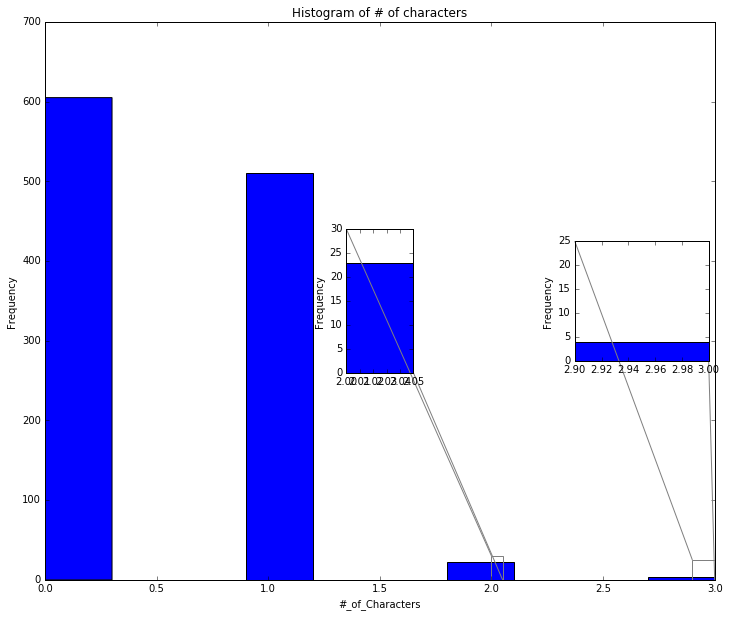

In [24]:
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

ndfl=dflines[dflines['#_of_protagonists']>0  ]

fig, ax = plt.subplots(figsize=[12, 10])
axes2 = zoomed_inset_axes(ax, 6, loc=5)  # zoom = 6

dflines['#_of_protagonists'].plot.hist(ax=ax)

ax.set_xlabel('#_of_Characters')
ax.set_ylabel('Frequency')
ax.set_title('Histogram of # of characters')

x1, x2, y1, y2 = 2.9, 3., 0, 25
axes2.set_xlim(x1, x2)
axes2.set_ylim(y1, y2)
ndfl['#_of_protagonists'].plot.hist(ax=axes2)
axes2.set_ylabel('Frequency')

mark_inset(ax, axes2, loc1=2, loc2=4, fc="none", ec="0.5")
axes3 = zoomed_inset_axes(ax, 6, loc=10)

x1, x2, y1, y2 = 2, 2.05, 0, 30
axes3.set_xlim(x1, x2)
axes3.set_ylim(y1, y2)
ndfl['#_of_protagonists'].plot.hist(ax=axes3)
axes3.set_ylabel('Frequency')

mark_inset(ax, axes3, loc1=2, loc2=4, fc="none", ec="0.5")

plt.show()

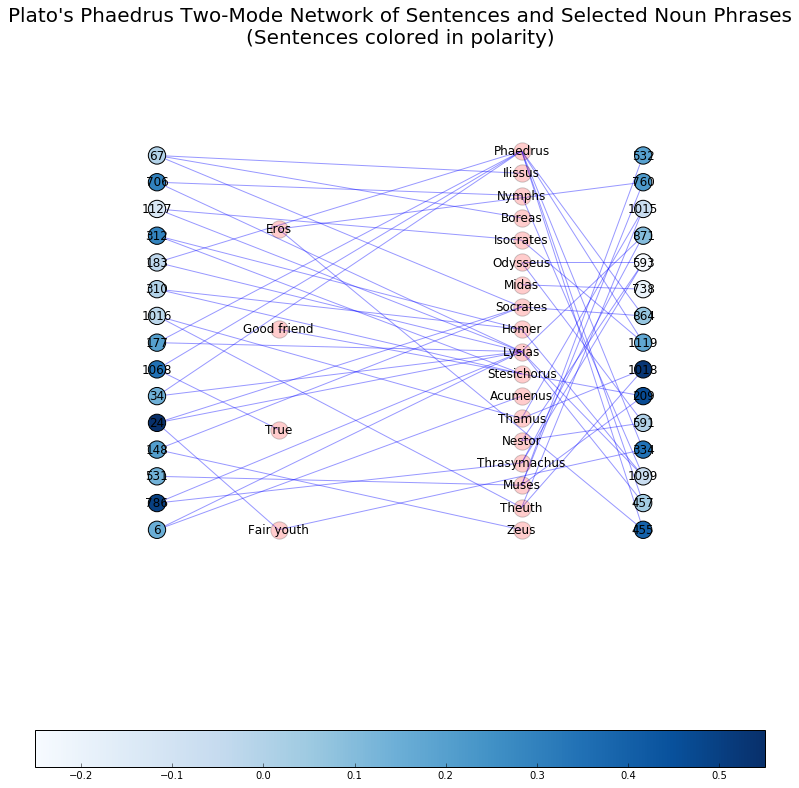

In [25]:
%autoreload 2

draw_network_node_color=tool.draw_network_node_color
sstt="%s Two-Mode Network of Sentences and Selected Noun Phrases" %titlename
pos=nx.spring_layout(sec_prot)
# pos=DefaultDict
nds=[nd for nd in sec_prot.nodes() if isinstance(nd,int)]
prot=[nd for nd in sec_prot.nodes() if nd not in nds]
ncont=dict(control_dic)
# print ncont
ncont[u'Midas']=0
# prot.append('Midas')
protag=[nd for nd in prot if int(ncont[nd])==0 ]
# pos={nd:{0:0,1:0} for nd in sec_prot}
nprotag=[nd for nd in prot if  int(ncont[nd])==1 or int(ncont[nd])==2]
# print protag
# print nprotag
for en,nd in enumerate(nds):
    if en<len(nds)/2.:
        pos[nd][0]=-1
        pos[nd][1]=en*2./len(nds)
    else:
        pos[nd][0]=1
        pos[nd][1]=(en-len(nds)/2.)*2./len(nds)
for en ,nd in enumerate(protag):
    pos[nd][0]=.5
    pos[nd][1]=en*1./len(protag)
for en ,nd in enumerate(nprotag):
    pos[nd][0]=-.5
    pos[nd][1]=en*1./len(nprotag)
# print pos    
possit=draw_network_node_color(sec_prot,sstt,pos=pos,with_edgewidth=False,withLabels=True,labfs=12,valpha=0.2,
                               ealpha=0.4,labelfont=15,with_node_weight=False,node_size_fixer=300.,node_col='polarity')

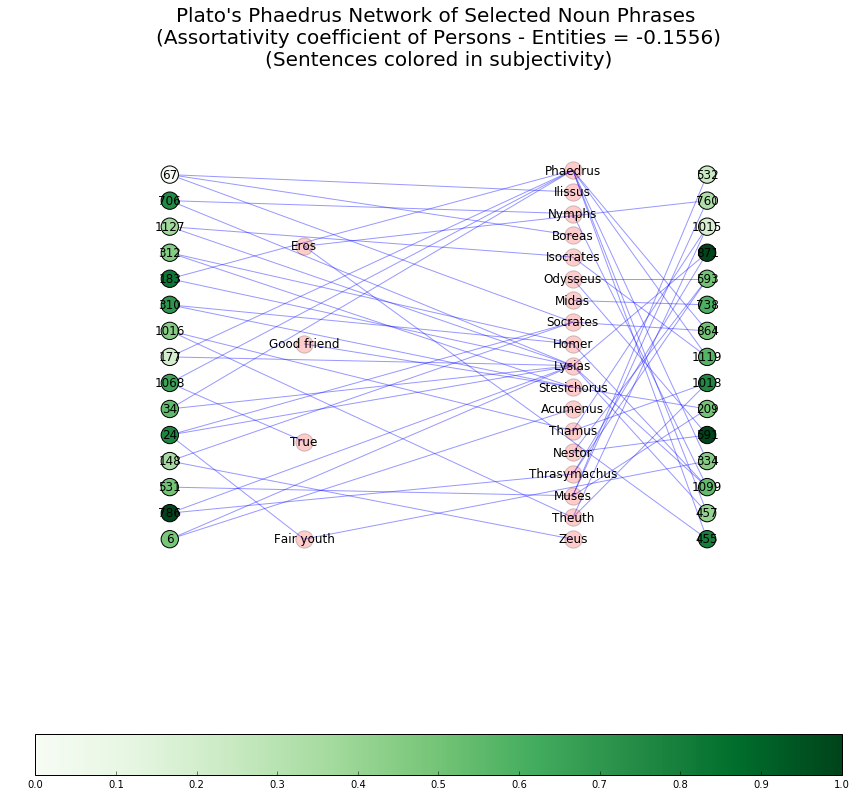

In [27]:
possit=draw_network_node_color(sec_prot,sstt,pos=pos,with_edgewidth=False,withLabels=True,labfs=12,valpha=0.2,
                               ealpha=0.4,labelfont=15,with_node_weight=False,node_size_fixer=300.,
                               node_col='subjectivity',colormat='Greens')

## III. Constructing the Network of Sententially Co-Occurring Noun Phrases in Plato's *Phaedrus*

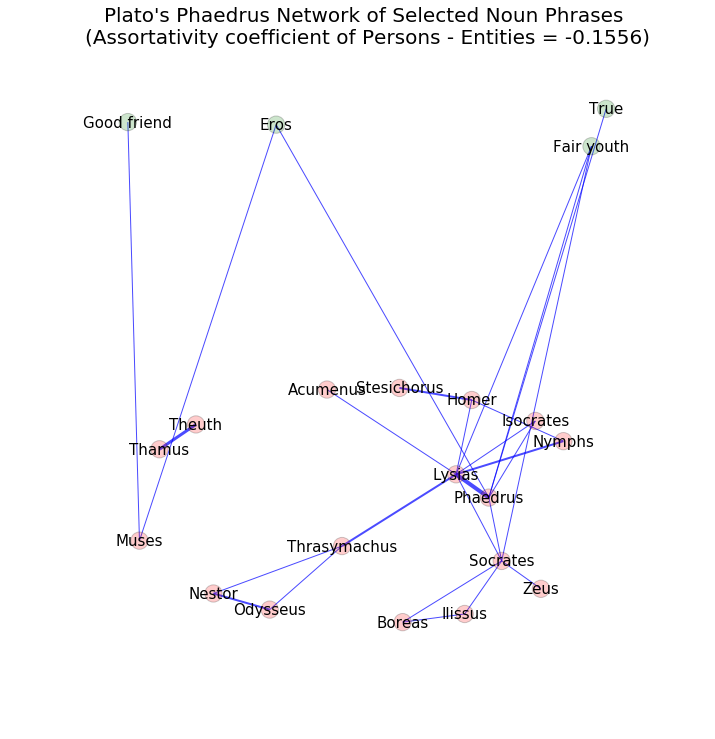

In [40]:
%autoreload 2

plist = prot_pol_sub['list_of_selected_noun_phrases'].tolist()
pplist=prot_pol_sub['polarity'].tolist()
nplist=prot_pol_sub['#_of_selected_noun_phrases'].tolist()
splist=prot_pol_sub['subjectivity'].tolist()

G = tool.make_graph_from_lists(plist,pplist,nplist,splist)
# print G.nodes(data=True)
for nd in G.nodes():
    G.add_node(nd,type=control_dic[nd])
posg=nx.spring_layout(G,scale=50)#,k=0.55)#,iterations=20)
nodescolor={}
npos={}
d=40
for nd in G.nodes():
    opos=posg[nd]

    if nd in protag:
        nodescolor[nd]='r'
        npos[nd]=[opos[0],opos[1]-d]
    else:
        nodescolor[nd]='g'
        npos[nd]=[opos[0],opos[1]+d]
# npos={v:k for v,k in pos.items() if v in G}        

sstt="%s Network of Selected Noun Phrases \n(Assortativity coefficient of Persons - Entities = %.4f)" %(titlename,nx.attribute_assortativity_coefficient(G,'type'))
possit=tool.draw_network(G,sstt,pos=npos,with_edgewidth=True,withLabels=True,labfs=15,valpha=0.2,ealpha=0.7,labelfont=15,
                   with_edgecolor=False,edgecolor='polarity',colormat='Blues',node_col=nodescolor)

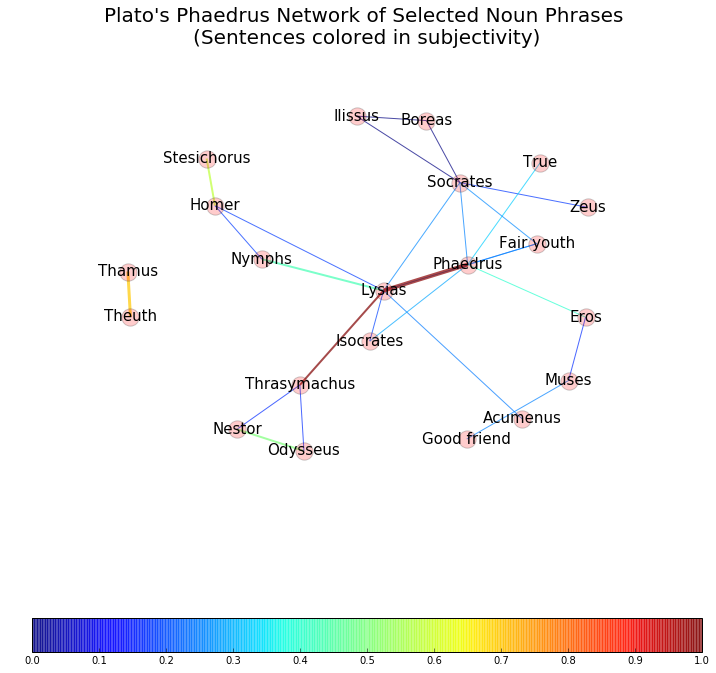

In [10]:
sstt="%s Network of Selected Noun Phrases \n(Sentences colored in subjectivity)" %titlename
possit=tool.draw_network(G,sstt,pos=posg,with_edgewidth=True,withLabels=True,labfs=15,valpha=0.2,ealpha=0.7,labelfont=15,
                   with_edgecolor=True,edgecolor='subjectivity',colormat='Greys')

## IV. Centralities of Nodes in the Network of Sententially Co-Occurring Noun Phrases in Plato's *Phaedrus*

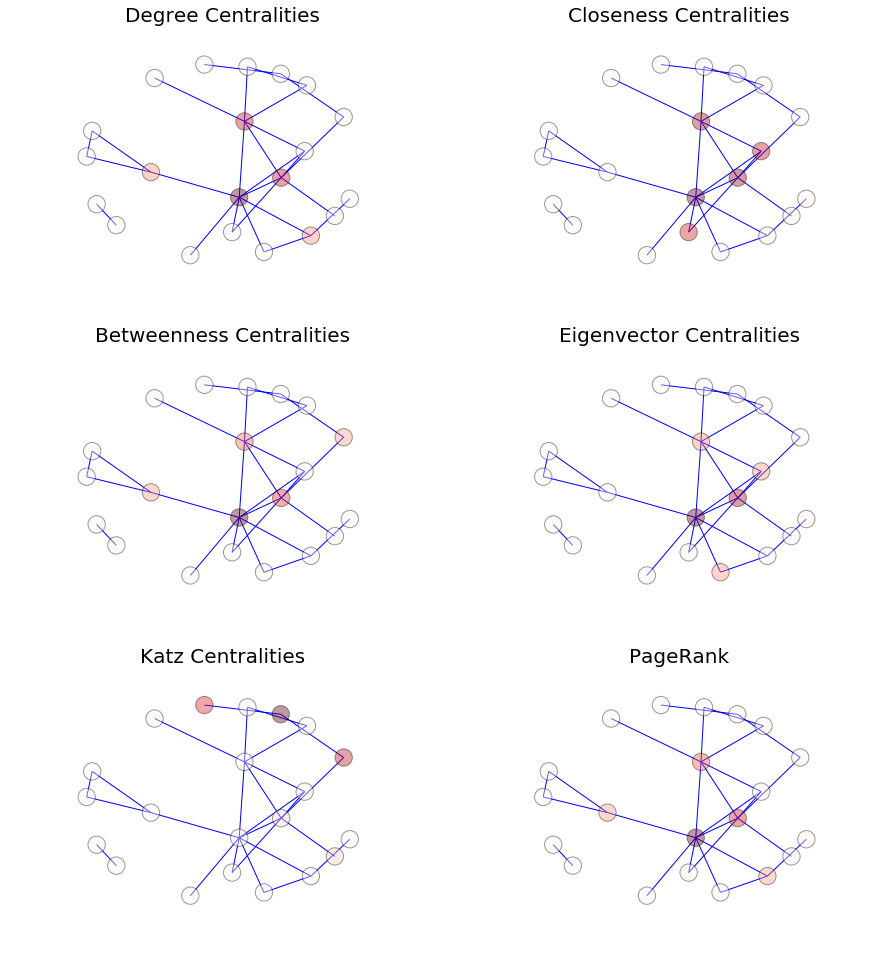

In [10]:
centrali=tool.draw_centralities_subplots(G,pos=posg,withLabels=False,labfs=5,figsi=(15,22),ealpha=1,vals=True)

### The table of Centralities of Nodes in the Network of Sententially Co-Occurring Noun Phrases in Plato's *Phaedrus*

In [11]:
dfc=pd.DataFrame()
u=0
for i,k in centrali.items():
    dfc.insert(u,i,k.values())
    u+=1
dfc.insert(0,'Nodes',centrali[centrali.keys()[0]].keys())
dfc

,Nodes,closeness_centrality,katz_centrality,betweenness_centrality,page_rank,eigenvector_centrality,degree_centrality
0,Homer,0.360000,-0.053608,0.089474,0.053734,1.533181e-01,0.15
1,Isocrates,0.376744,0.056198,0.000000,0.018958,1.874343e-01,0.10
2,Acumenus,0.337500,0.003975,0.000000,0.032971,3.916231e-02,0.05
3,Boreas,0.311538,-0.145885,0.000000,0.038794,4.661858e-02,0.10
4,Odysseus,0.270000,-0.029806,0.000000,0.045422,2.322199e-03,0.10
5,Ilissus,0.311538,-0.145885,0.000000,0.017870,2.271267e-01,0.10
6,Muses,0.261290,0.634843,0.089474,0.017259,1.451883e-02,0.10
7,Phaedrus,0.476471,0.085887,0.323684,0.047619,8.613205e-02,0.30
8,Zeus,0.305660,-0.057182,0.000000,0.029980,1.013023e-01,0.05
9,Lysias,0.522581,-0.092672,0.497368,0.032971,4.904428e-02,0.40


## V. Communities of Nodes in the Network of Sententially Co-Occurring Noun Phrases in Plato's *Phaedrus*

Number of communities of Plato's Phaedrus Network of Selected Noun Phrases 
(Sentences colored in subjectivity) = 6
Community partition of Plato's Phaedrus Network of Selected Noun Phrases 
(Sentences colored in subjectivity):
[[u'Homer', u'Stesichorus'], [u'Zeus', u'Socrates', u'Ilissus', u'Boreas'], [u'Nymphs', u'Fair youth', u'Isocrates', u'True', u'Acumenus', u'Phaedrus', u'Lysias'], [u'Muses', u'Good friend', u'Eros'], [u'Theuth', u'Thamus'], [u'Thrasymachus', u'Odysseus', u'Nestor']]
Community modularity of Plato's Phaedrus Network of Selected Noun Phrases 
(Sentences colored in subjectivity) = 0.4976


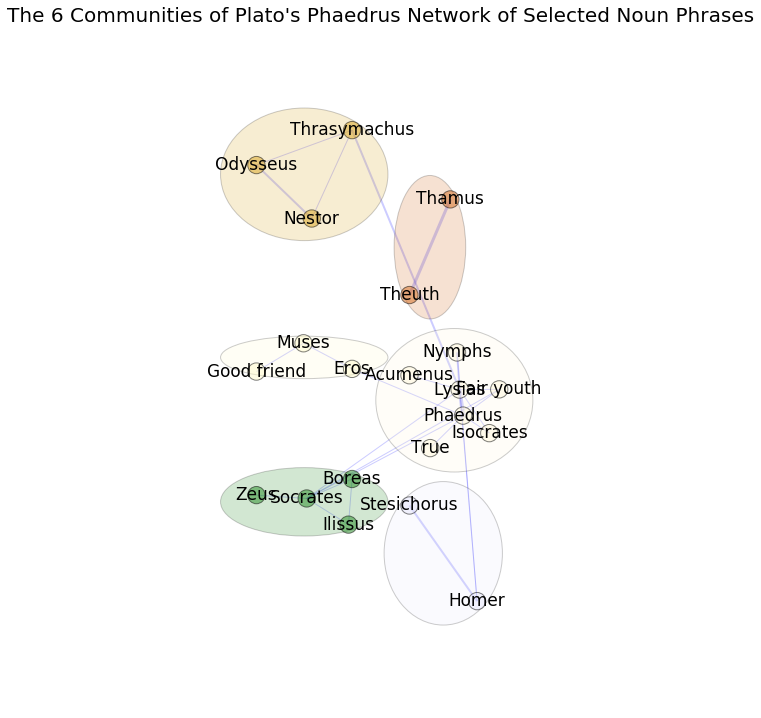

In [12]:
%autoreload 2

part,nodper=tool.print_communities(G,sstt)

d=0.8 
dd=0.8
c=1.2
cc=1.4
alpha=0.2
ealpha=0.2
vcc={}
sstta="The %s Communities of %s Network of Selected Noun Phrases" %(max(part.values())+1,titlename)#sstt)

tool.draw_comms(G,G.nodes(),[],[],[] ,part,part,d,dd,c,cc,alpha,ealpha,nodper,sstta,titlefont=20,labelfont=17,valpha=0.5)

## VII. Trajectories of Transitions among Sentential Co-Occurrences in Plato's *Phaedrus* 

### More about Transitions and Trajectories in Temporal Networks:

### http://www.slideshare.net/MosesBoudourides/trajectories1

In [13]:
%autoreload 2

tool= imp.load_source('tools', utilsdir+'tools.py')
trj= imp.load_source('trajectories', utilsdir+'trajectories_t.py')

In [14]:
protagonists=prot_pol_sub.list_of_selected_noun_phrases.tolist()

start=range(1,len(protagonists)+1)
end=range(2,len(protagonists)+2)
polarities=prot_pol_sub.polarity.tolist()
subj=prot_pol_sub.subjectivity.tolist()

### Transitions among Sentential Co-Occurrences of *Phaedrus* and Other Characters 

['Phaedrus']

Statistics of trajectories of first mode vertices

Phaedrus [[u'Lysias__3', u'Lysias__4'], [u'Lysias__3', u'Lysias__14'], [u'Lysias__3', u'Lysias__8'], [u'Lysias__3', u'Socrates__20'], [u'Lysias__3', u'True__25'], [u'Lysias__3', u'Isocrates__27'], [u'Lysias__6', u'Lysias__4'], [u'Lysias__6', u'Lysias__14'], [u'Lysias__6', u'Lysias__8'], [u'Lysias__6', u'Socrates__20'], [u'Lysias__6', u'True__25'], [u'Lysias__6', u'Isocrates__27'], [u'Socrates__19', u'Lysias__4'], [u'Socrates__19', u'Lysias__14'], [u'Socrates__19', u'Lysias__8'], [u'Socrates__19', u'Socrates__20'], [u'Socrates__19', u'True__25'], [u'Socrates__19', u'Isocrates__27'], [u'True__24', u'Lysias__4'], [u'True__24', u'Lysias__14'], [u'True__24', u'Lysias__8'], [u'True__24', u'Socrates__20'], [u'True__24', u'True__25'], [u'True__24', u'Isocrates__27'], [u'Isocrates__26', u'Lysias__4'], [u'Isocrates__26', u'Lysias__14'], [u'Isocrates__26', u'Lysias__8'], [u'Isocrates__26', u'Socrates__20'], [u'Isocrates__26', u'True

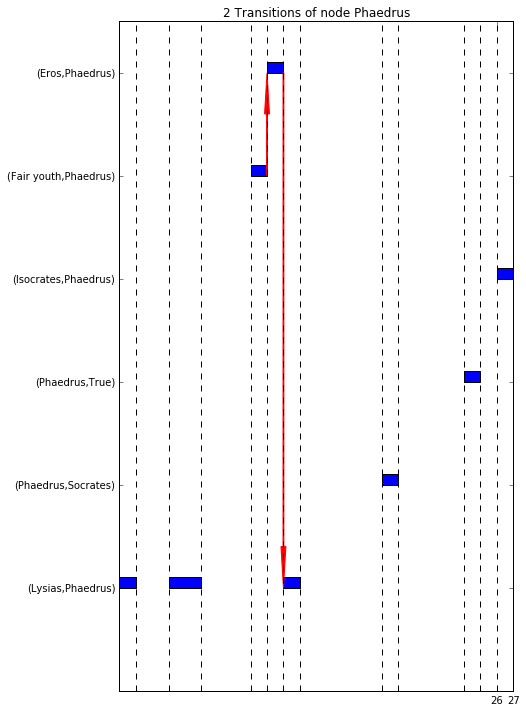

In [15]:
qq=0
figi=None
search_name='Phaedrus'

G,ndls,pold,subjd=trj.creatTestGraph_pandas_bips(start,end,protagonists,search_name,polarities,subj)

trajpdfs=trj.main_work_search_name(G,ndls,qq,figi,search_name,verb=False,no_anala=True,plot_first_mode=False)
# trajpdfs=trj.main_work_search_name(G,ndls,qq,figi,search_name,verb=False,no_anala=False,plot_first_mode=False)

### Statistics of the Trajectory of Transitions among Sentential Co-Occurrences of *Phaedrus* and Other Characters

In [16]:
trajpdfs["['Phaedrus']"]

,Vertices,fOriginator,fTransmitter,fTerminator,fBlackHole,fInvolvement,pOriginator,pTransmitter,pTerminator,pBlackHole,lOriginator,lTransmitter,lTerminator,lBlackHole,lInvolvement,Position,RelPosition,Betweenness
0,Socrates,1,0,1,1,1,1.000000,0,1,1.000000,1,0,1.000000,8,1.000000,1.000000,0.000000,0
1,Fair youth,1,0,0,0,1,1.000000,0,0,0.000000,3,0,0.000000,0,3.000000,1.000000,0.000000,0
2,Isocrates,1,0,1,1,1,1.000000,0,1,1.000000,1,0,1.000000,9,1.000000,1.000000,0.000000,0
3,Lysias,2,0,3,2,3,0.666667,0,1,0.666667,1,0,1.666667,6,1.666667,1.666667,33.333333,0
4,True,1,0,1,1,1,1.000000,0,1,1.000000,1,0,1.000000,4,1.000000,1.000000,0.000000,0
5,Eros,0,1,0,0,1,0.000000,1,0,0.000000,0,3,0.000000,0,3.000000,2.000000,50.000000,1


### The Trajectory of Transitions among Sentential Co-Occurrences of *Phaedrus* and Other Characters:

#### Nodes are Co-Occurrences of *Phaedrus* with Other Characters 

#### The Color of Nodes Corresponds to Sentential Sentiment Polarities Varying from Color Red (-1) to Color Green (1)

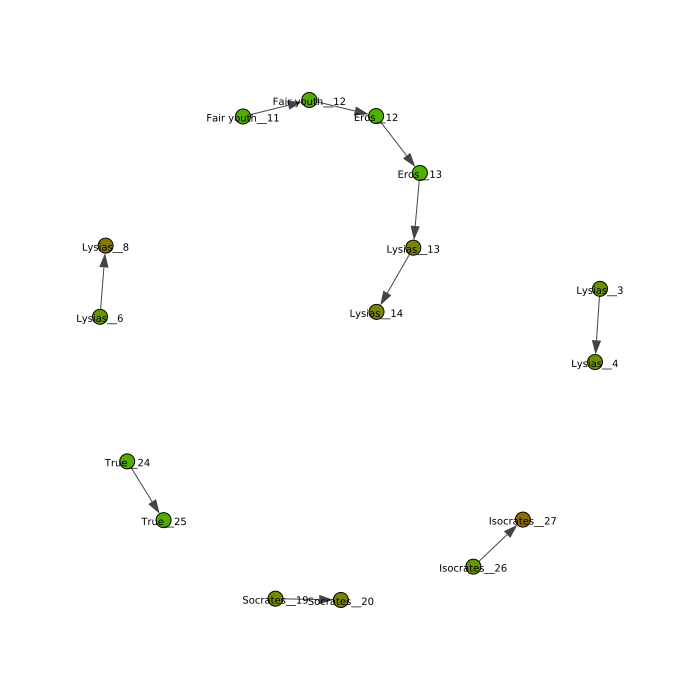

In [17]:
import igraph as ig

igraph_draw_traj=tool.igraph_draw_traj
filname='S_out_graphs/%s_graph.graphml' %search_name
g,visual_style,layout=igraph_draw_traj(filname,pold)

ig.plot(g,  **visual_style)

#### The Color of Nodes Corresponds to Sentential Sentiment Subjectivities Varying from Color Red (0) to Color Green (1)

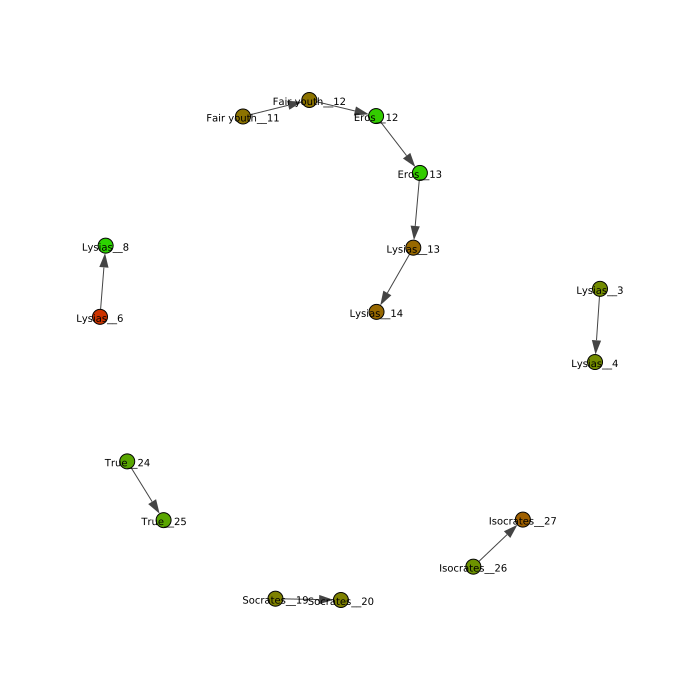

In [18]:
g,visual_style,layout=igraph_draw_traj(filname,subjd,polar=False,layout=layout)

ig.plot(g,  **visual_style)

### Transitions among Sentential Co-Occurrences of *Lysias* and Other Characters 

[u'Homer', u'Acumenus', u'Nymphs', u'Thrasymachus', u'Fair youth', u'Isocrates', u'Phaedrus']

Statistics of trajectories of first mode vertices

Phaedrus [['Lysias__3', 'Lysias__4'], ['Lysias__3', 'Lysias__14'], ['Lysias__3', 'Lysias__8'], ['Lysias__13', 'Lysias__4'], ['Lysias__13', 'Lysias__14'], ['Lysias__13', 'Lysias__8'], ['Lysias__6', 'Lysias__4'], ['Lysias__6', 'Lysias__14'], ['Lysias__6', 'Lysias__8']]
1 trajectories analyzed.
['Lysias']

Statistics of trajectories of second mode vertices

Lysias [[u'Phaedrus__13', u'Phaedrus__4'], [u'Phaedrus__13', u'Phaedrus__14'], [u'Phaedrus__13', u'Phaedrus__8'], [u'Phaedrus__13', u'Nymphs__17'], [u'Phaedrus__13', u'Isocrates__28'], [u'Phaedrus__13', u'Thrasymachus__19'], [u'Phaedrus__13', u'Thrasymachus__21'], [u'Phaedrus__13', u'Homer__26'], [u'Phaedrus__6', u'Phaedrus__4'], [u'Phaedrus__6', u'Phaedrus__14'], [u'Phaedrus__6', u'Phaedrus__8'], [u'Phaedrus__6', u'Nymphs__17'], [u'Phaedrus__6', u'Isocrates__28'], [u'Phaedrus__6', u'Thrasyma

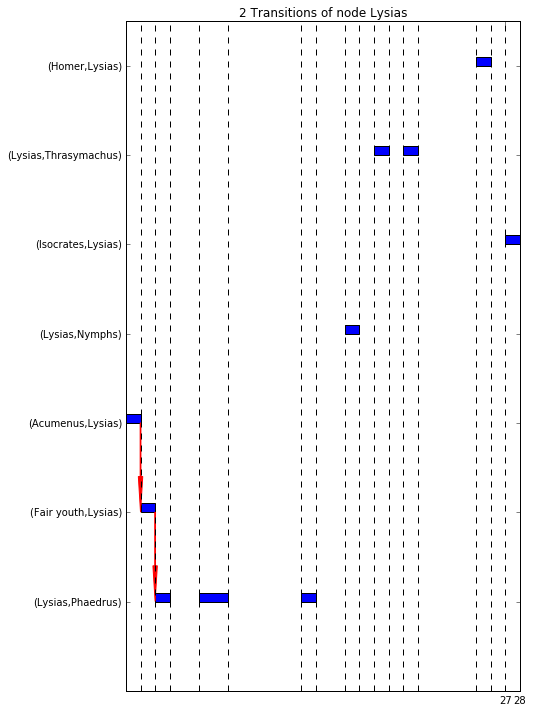

In [19]:
qq=0
figi=None
search_name='Lysias'

G,ndls,pold,subjd=trj.creatTestGraph_pandas_bips(start,end,protagonists,search_name,polarities,subj)

trajpdfs=trj.main_work_search_name(G,ndls,qq,figi,search_name,verb=False,no_anala=True,plot_first_mode=False)
# trajpdfs=trj.main_work_search_name(G,ndls,qq,figi,search_name,verb=False,no_anala=False,plot_first_mode=False)

### Statistics of the Trajectory of Transitions among Sentential Co-Occurrences of *Lysias* and Other Characters

In [20]:
trajpdfs["['Lysias']"]

,Vertices,fOriginator,fTransmitter,fTerminator,fBlackHole,fInvolvement,pOriginator,pTransmitter,pTerminator,pBlackHole,lOriginator,lTransmitter,lTerminator,lBlackHole,lInvolvement,Position,RelPosition,Betweenness
0,Homer,1,0,1,1,1,1.000000,0,1,1.000000,1,0,1.000000,5,1.000000,1.000000,0.000000,0
1,Acumenus,1,0,0,0,1,1.000000,0,0,0.000000,3,0,0.000000,0,3.000000,1.000000,0.000000,0
2,Nymphs,1,0,1,1,1,1.000000,0,1,1.000000,1,0,1.000000,6,1.000000,1.000000,0.000000,0
3,Thrasymachus,2,0,2,2,2,1.000000,0,1,1.000000,1,0,1.000000,12,1.000000,1.000000,0.000000,0
4,Fair youth,0,1,0,0,1,0.000000,1,0,0.000000,0,3,0.000000,0,3.000000,2.000000,50.000000,1
5,Isocrates,1,0,1,1,1,1.000000,0,1,1.000000,1,0,1.000000,9,1.000000,1.000000,0.000000,0
6,Phaedrus,2,0,3,2,3,0.666667,0,1,0.666667,1,0,1.666667,8,1.666667,1.666667,33.333333,0


### The Trajectory of Transitions among Sentential Co-Occurrences of *Lysias* and Other Characters:

#### Nodes are Co-Occurrences of *Lysias* with Other Characters 

#### The Color of Nodes Corresponds to Sentential Sentiment Polarities Varying from Color Red (-1) to Color Green (1)

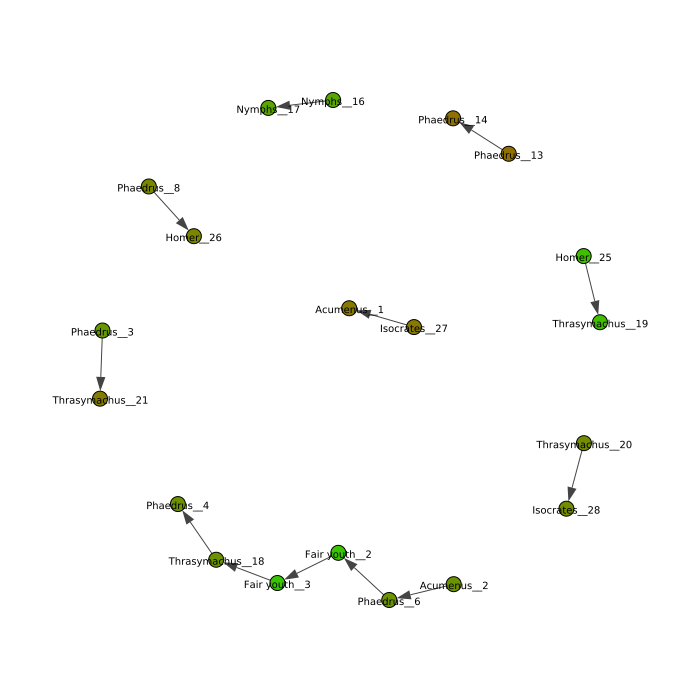

In [21]:
import igraph as ig

igraph_draw_traj=tool.igraph_draw_traj
filname='S_out_graphs/%s_graph.graphml' %search_name
g,visual_style,layout=igraph_draw_traj(filname,pold)

ig.plot(g,  **visual_style)

#### The Color of Nodes Corresponds to Sentential Sentiment Subjectivities Varying from Color Red (0) to Color Green (1)

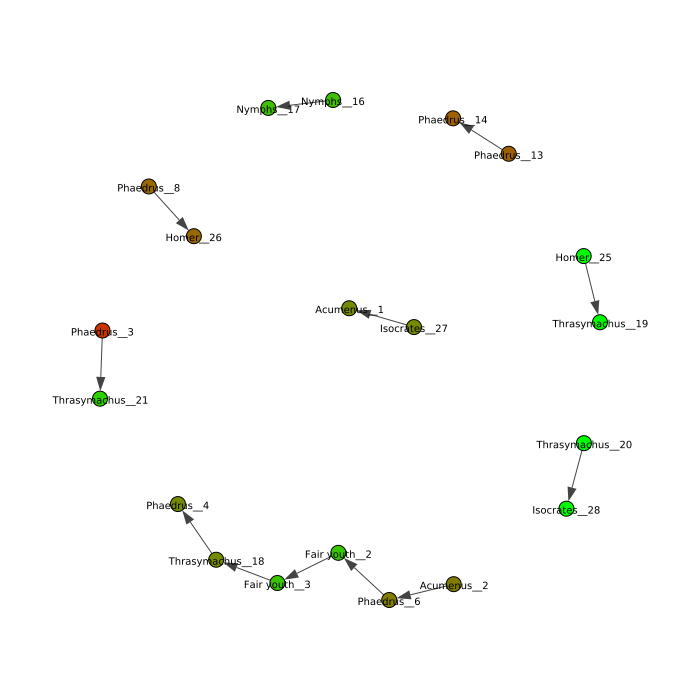

In [22]:
g,visual_style,layout=igraph_draw_traj(filname,subjd,polar=False,layout=layout)

ig.plot(g,  **visual_style)

### Transitions among Sentential Co-Occurrences of *Socrates* and Other Characters 

[u'Fair youth', u'Zeus', u'Phaedrus', u'Ilissus']

Statistics of trajectories of first mode vertices

Ilissus [['Socrates__4', 'Socrates__5']]
1 trajectories analyzed.
['Socrates']

Statistics of trajectories of second mode vertices

Socrates [[u'Fair youth__2', u'Fair youth__3'], [u'Fair youth__2', u'Phaedrus__20'], [u'Fair youth__2', u'Zeus__6'], [u'Phaedrus__19', u'Fair youth__3'], [u'Phaedrus__19', u'Phaedrus__20'], [u'Phaedrus__19', u'Zeus__6'], [u'Ilissus__4', u'Fair youth__3'], [u'Ilissus__4', u'Phaedrus__20'], [u'Ilissus__4', u'Zeus__6']]
1 trajectories analyzed.


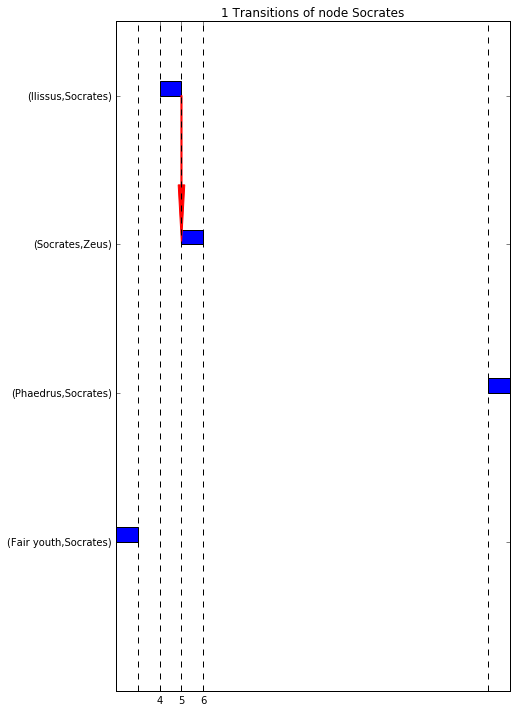

In [23]:
qq=0
figi=None
search_name='Socrates'

G,ndls,pold,subjd=trj.creatTestGraph_pandas_bips(start,end,protagonists,search_name,polarities,subj)

trajpdfs=trj.main_work_search_name(G,ndls,qq,figi,search_name,verb=False,no_anala=True,plot_first_mode=False)
# trajpdfs=trj.main_work_search_name(G,ndls,qq,figi,search_name,verb=False,no_anala=False,plot_first_mode=False)

### Statistics of the Trajectory of Transitions among Sentential Co-Occurrences of *Socrates* and Other Characters

In [24]:
trajpdfs["['Socrates']"]

,Vertices,fOriginator,fTransmitter,fTerminator,fBlackHole,fInvolvement,pOriginator,pTransmitter,pTerminator,pBlackHole,lOriginator,lTransmitter,lTerminator,lBlackHole,lInvolvement,Position,RelPosition,Betweenness
0,Fair youth,1,0,1,1,1,1,0,1,1,1,0,1,10,1,1,0,0
1,Zeus,0,0,1,0,1,0,0,1,0,0,0,2,0,2,2,100,0
2,Phaedrus,1,0,1,1,1,1,0,1,1,1,0,1,8,1,1,0,0
3,Ilissus,1,0,0,0,1,1,0,0,0,2,0,0,0,2,1,0,0


### The Trajectory of Transitions among Sentential Co-Occurrences of *Socrates* and Other Characters:

#### Nodes are Co-Occurrences of *Socrates* with Other Characters 

#### The Color of Nodes Corresponds to Sentential Sentiment Polarities Varying from Color Red (-1) to Color Green (1)

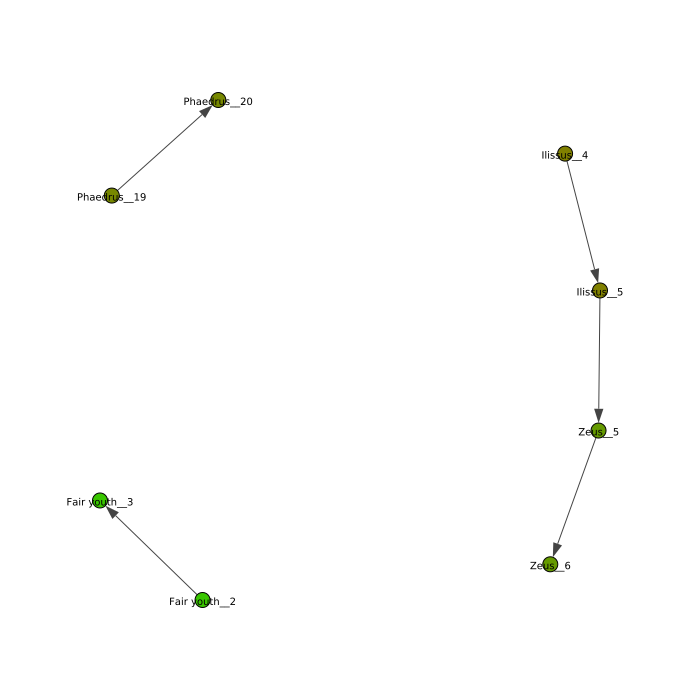

In [25]:
import igraph as ig

igraph_draw_traj=tool.igraph_draw_traj
filname='S_out_graphs/%s_graph.graphml' %search_name
g,visual_style,layout=igraph_draw_traj(filname,pold)

ig.plot(g,  **visual_style)

#### The Color of Nodes Corresponds to Sentential Sentiment Subjectivities Varying from Color Red (0) to Color Green (1)

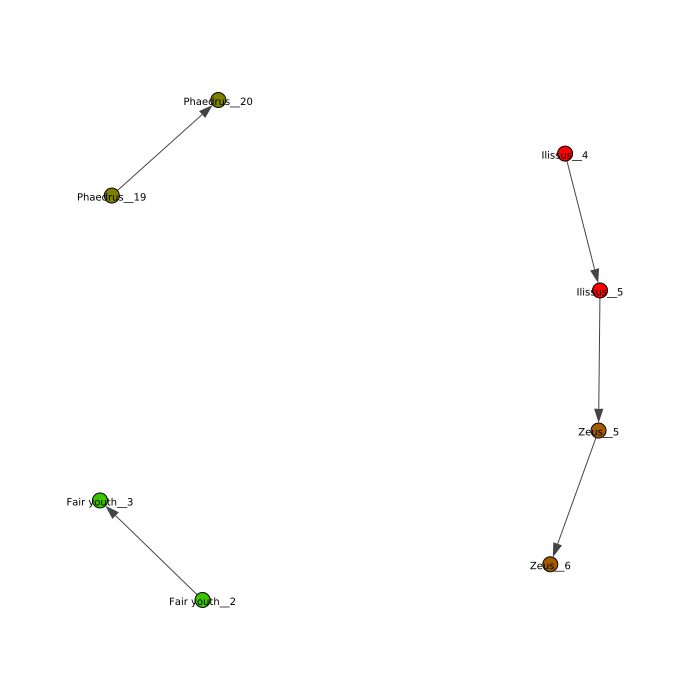

In [26]:
g,visual_style,layout=igraph_draw_traj(filname,subjd,polar=False,layout=layout)

ig.plot(g,  **visual_style)